# pycaret Beispiel zu Spam Klassifikation mit Worthäufigkeiten

hoppla: NLP ist aus pycaret entfernt worden. Also geht nur die hand getrickte Klassifikation. Ausserdem musste auf Version 3 umgebaut werden.

Nach dem pycaret Beispiel im Blog : https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/nlp-text-classification-in-python-using-pycaret

Daten von https://github.com/prateek025/SMS_Spam_Ham/blob/master/SMS_Spam_Ham_Raw.csv

# Two approaches of NLP-Classification : Traditional vs PyCaret

# Approach 1 : Traditional Method

Stage 1a : Data setup 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\noname\AppData\Local\Temp\ipykernel_23980\3449476860.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
df1 = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [3]:
df1.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df1.columns

Index([0, 1], dtype='int64')

In [5]:
df1.rename(columns={0:'Flag'}, inplace=True)
df1.rename(columns={1:'SMS_Original'}, inplace=True)


In [6]:
display(df1.head())
display(df1.tail())

,Flag,SMS_Original
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Flag,SMS_Original
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
df1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df1 = pd.get_dummies(df1, columns=['Flag'], drop_first=True)
display(df1.head())


,SMS_Original,Flag_spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False


In [9]:
df2 = df1
df2 = df2[['Flag_spam','SMS_Original']]
display(df2.head())
display(df2.tail())

,Flag_spam,SMS_Original
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


,Flag_spam,SMS_Original
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will ü b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...
5571,False,Rofl. Its true to its name


Stage 1b : Pre-processing on the Text data

In [1]:
import re
from bs4 import BeautifulSoup

In [11]:
# Remove HTTP tags
%time df2['SMS_Processed'] = df2['SMS_Original'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

CPU times: total: 93.8 ms
Wall time: 95 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,False,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,False,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...


In [12]:
#Lower Case
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: x.lower())
df2.head()

CPU times: total: 0 ns
Wall time: 2.01 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,False,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [13]:
#Remove punctuations
#lle Zeichen zu entfernen, die keine alphanumerischen Zeichen (\w) oder Leerzeichen (\s) sind. 
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

CPU times: total: 15.6 ms
Wall time: 15.5 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,False,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [14]:
#Remove unicodes
# Nicht-ASCII-Zeichen entfernen, nicht zwischen 0 und 127
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

CPU times: total: 15.6 ms
Wall time: 18.9 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,False,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [16]:
# Remove stopwords
stop_words = stopwords.words('english')
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

CPU times: total: 266 ms
Wall time: 271 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,False,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [17]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

CPU times: total: 4.83 s
Wall time: 4.89 s


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,False,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [18]:
#Removing Stop words again after Lemmatize
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())
display(df2.tail())

CPU times: total: 219 ms
Wall time: 216 ms


,Flag_spam,SMS_Original,SMS_Processed
0,False,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,False,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


,Flag_spam,SMS_Original,SMS_Processed
5567,True,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,False,Will ü b going to esplanade fr home?,b going esplanade fr home
5569,False,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,False,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...
5571,False,Rofl. Its true to its name,rofl true name


Stage 2 : Embedding on the processed text data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

Before we move further, lets do some exploratory analysis by finding the most common and rare words

In [20]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [23]:
#10 most common and 10 most rare words
common_words = get_n_words(df2['SMS_Processed'], "top", 15)
rare_words = get_n_words(df2['SMS_Processed'], "bottom", 15)

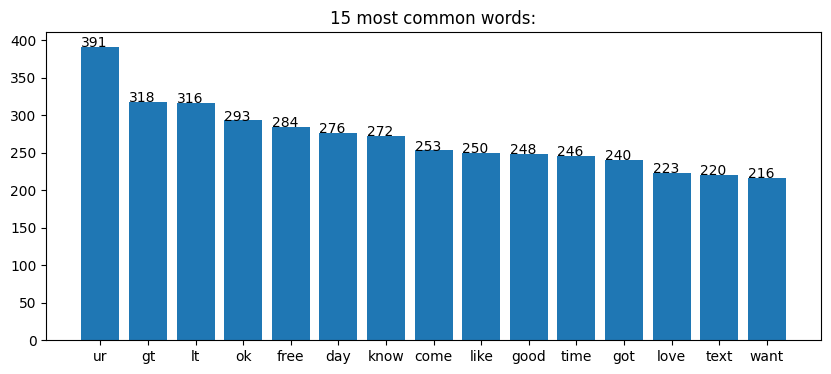

In [24]:
# neu eingefügt
%matplotlib inline
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (10,4))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()


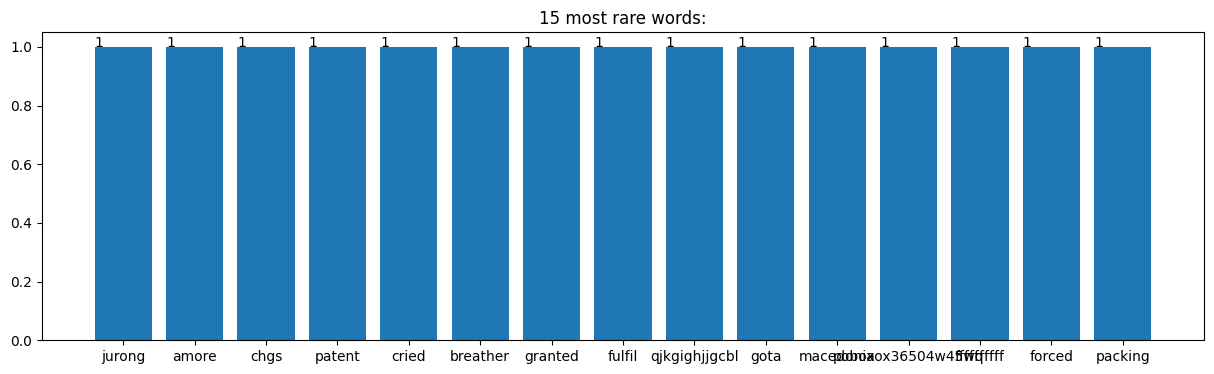

In [25]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,4))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [26]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=(1, 3))

tpl_tf = tf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names_out()) # Korrektur get_feature_names
display(df_tf.head())

'Bow-TF :'

(5572, 77)

,already,back,call,claim,co,come,da,day,dear,dont,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
df_tf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(5572, 78)


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,False,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
5567,True,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5571,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=(1,3))

tpl_tfidf = tfidf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df2.index)
display(df_tfidf.head())

'Bow-TF:IDF :'

(5572, 53)

,back,call,co,come,da,day,dont,free,get,go,...,tell,text,think,time,today,txt,ur,want,week,well
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.686701,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556016,0.0,0.000000,...,0.0,0.575908,0.000000,0.0,0.0,0.599313,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647488,...,0.0,0.000000,0.762076,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(5572, 54)


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556016,0.0,...,0.0,0.575908,0.000000,0.0,0.0,0.599313,0.0,0.0,0.0,0.0
3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.762076,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
5567,True,0.0,0.618824,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.78553,0.0,0.0,0.0,0.0,0.000000,0.0
5568,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
5569,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
5570,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.549962,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.630043,0.0
5571,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0


Stage 3 : Model Building

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [31]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics
# neu eingefügt
%matplotlib inline

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [33]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Flag_spam']
    X = df.drop('Flag_spam', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4736, 77)
Test Data Dimensions :  (836, 77)

 Random Forest Classifier
CPU times: total: 1.88 s
Wall time: 1.88 s

 Confusion Matrix


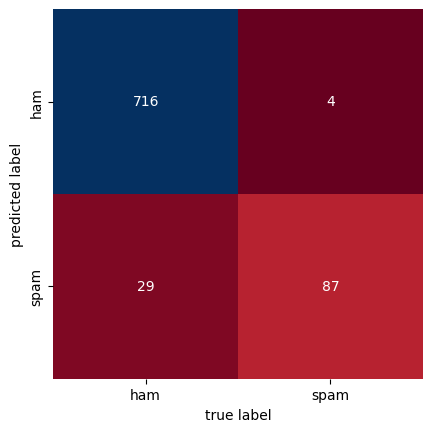


 Classification Report 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       720
        True       0.96      0.75      0.84       116

    accuracy                           0.96       836
   macro avg       0.96      0.87      0.91       836
weighted avg       0.96      0.96      0.96       836

Overall Accuracy :  96.05
Precision Score :  95.6
Recall Score :  75.0
AUC :  96.02 



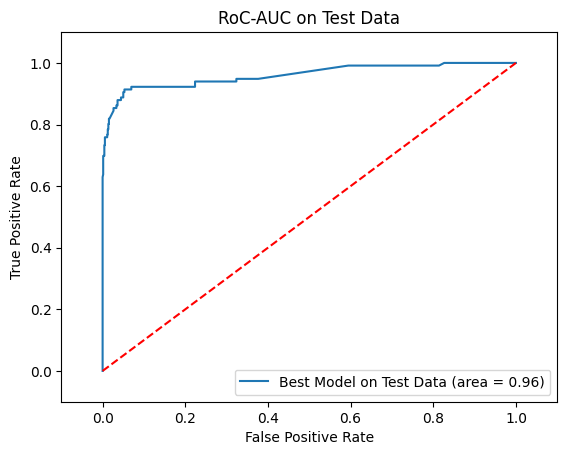

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: total: 1.48 s
Wall time: 1.51 s

 Confusion Matrix


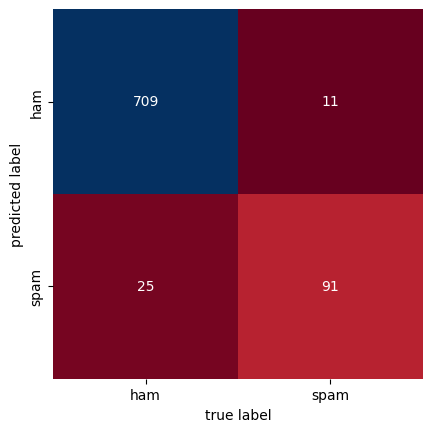


 Classification Report 

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       720
        True       0.89      0.78      0.83       116

    accuracy                           0.96       836
   macro avg       0.93      0.88      0.91       836
weighted avg       0.96      0.96      0.96       836

Overall Accuracy :  95.69
Precision Score :  89.22
Recall Score :  78.45
AUC :  95.94 



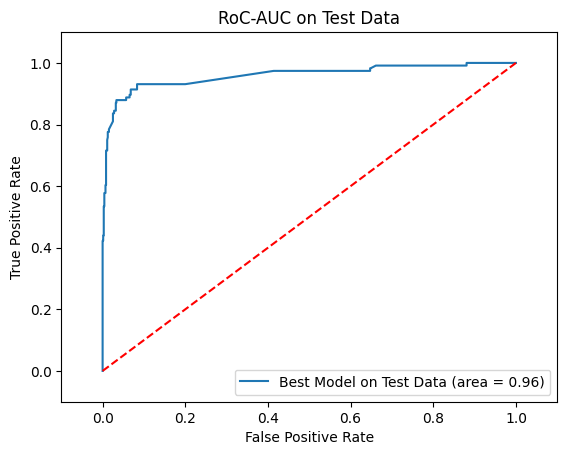

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: total: 328 ms
Wall time: 336 ms

 Confusion Matrix


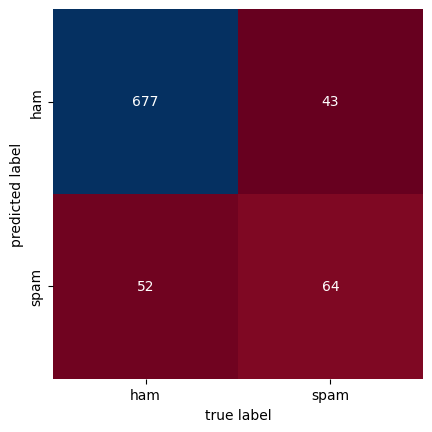


 Classification Report 

              precision    recall  f1-score   support

       False       0.93      0.94      0.93       720
        True       0.60      0.55      0.57       116

    accuracy                           0.89       836
   macro avg       0.76      0.75      0.75       836
weighted avg       0.88      0.89      0.88       836

Overall Accuracy :  88.64
Precision Score :  59.81
Recall Score :  55.17
AUC :  67.87 



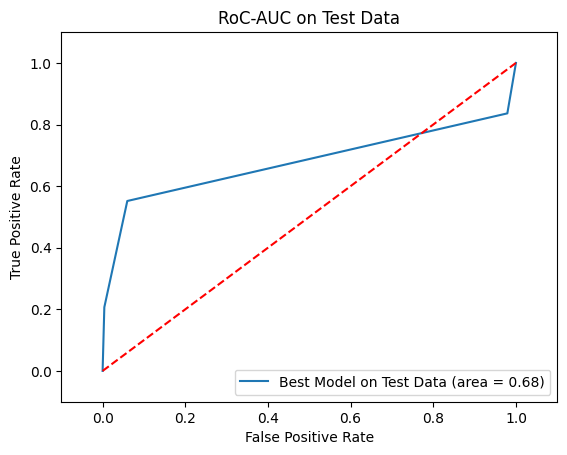

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: total: 15.6 ms
Wall time: 6.56 ms

 Confusion Matrix


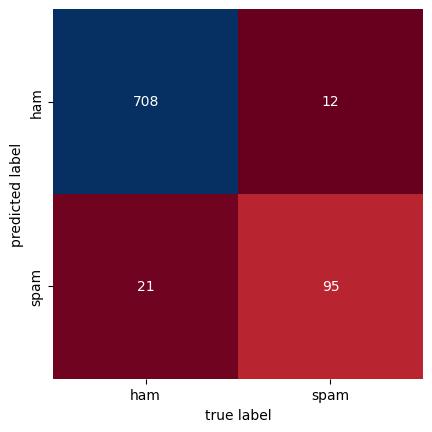


 Classification Report 

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       720
        True       0.89      0.82      0.85       116

    accuracy                           0.96       836
   macro avg       0.93      0.90      0.91       836
weighted avg       0.96      0.96      0.96       836

Overall Accuracy :  96.05
Precision Score :  88.79
Recall Score :  81.9
AUC :  96.36 



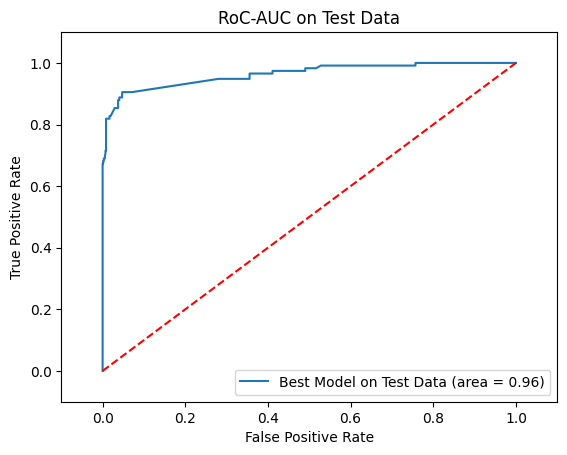

--------------------------------------------------------------------------
CPU times: total: 5.77 s
Wall time: 5.79 s


In [34]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)

Models on Term Frequency - Bag of Words: Inverse Document Frequency data
Train Data Dimensions :  (4736, 53)
Test Data Dimensions :  (836, 53)

 Random Forest Classifier
CPU times: total: 2.25 s
Wall time: 2.3 s

 Confusion Matrix


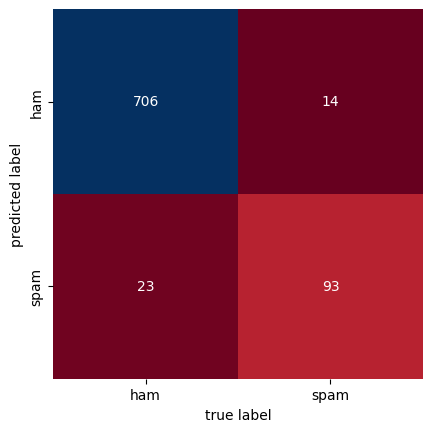


 Classification Report 

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       720
        True       0.87      0.80      0.83       116

    accuracy                           0.96       836
   macro avg       0.92      0.89      0.90       836
weighted avg       0.95      0.96      0.95       836

Overall Accuracy :  95.57
Precision Score :  86.92
Recall Score :  80.17
AUC :  95.44 



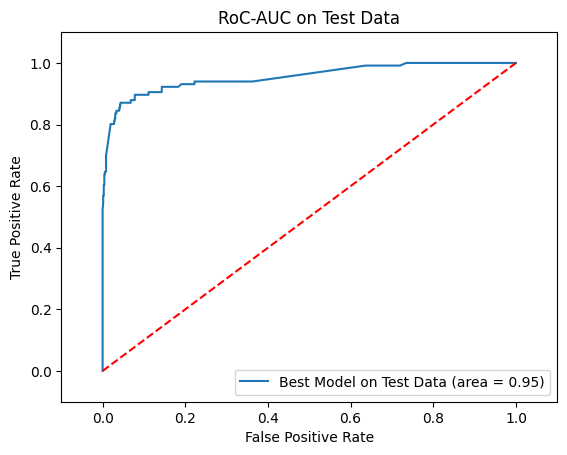

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: total: 1.3 s
Wall time: 1.3 s

 Confusion Matrix


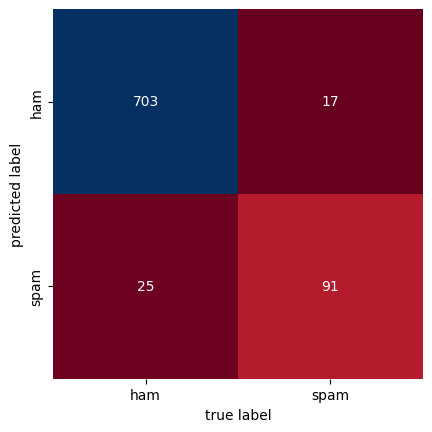


 Classification Report 

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       720
        True       0.84      0.78      0.81       116

    accuracy                           0.95       836
   macro avg       0.90      0.88      0.89       836
weighted avg       0.95      0.95      0.95       836

Overall Accuracy :  94.98
Precision Score :  84.26
Recall Score :  78.45
AUC :  92.98 



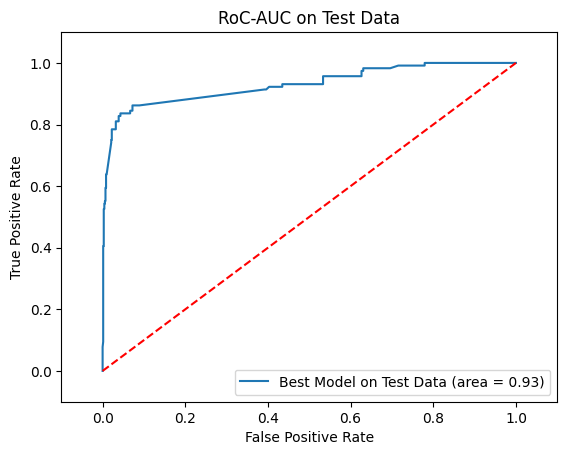

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: total: 406 ms
Wall time: 401 ms

 Confusion Matrix


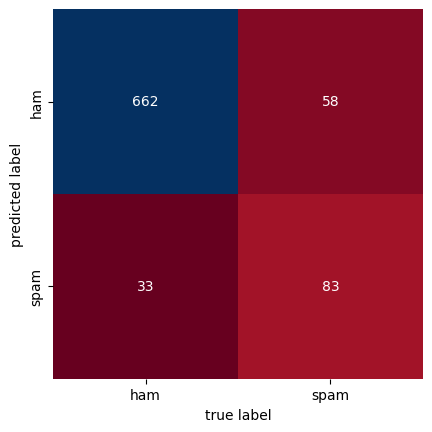


 Classification Report 

              precision    recall  f1-score   support

       False       0.95      0.92      0.94       720
        True       0.59      0.72      0.65       116

    accuracy                           0.89       836
   macro avg       0.77      0.82      0.79       836
weighted avg       0.90      0.89      0.90       836

Overall Accuracy :  89.11
Precision Score :  58.87
Recall Score :  71.55
AUC :  82.1 



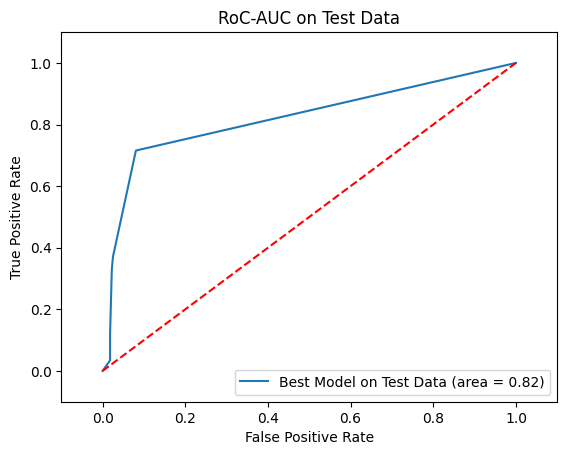

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: total: 0 ns
Wall time: 4.06 ms

 Confusion Matrix


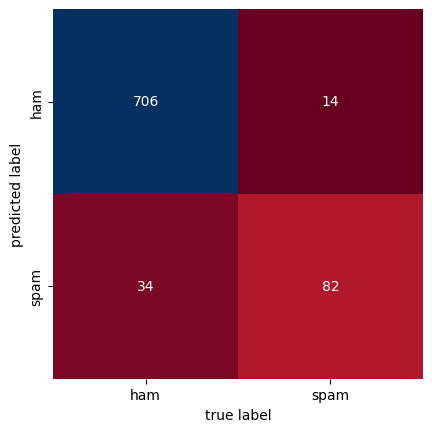


 Classification Report 

              precision    recall  f1-score   support

       False       0.95      0.98      0.97       720
        True       0.85      0.71      0.77       116

    accuracy                           0.94       836
   macro avg       0.90      0.84      0.87       836
weighted avg       0.94      0.94      0.94       836

Overall Accuracy :  94.26
Precision Score :  85.42
Recall Score :  70.69
AUC :  95.33 



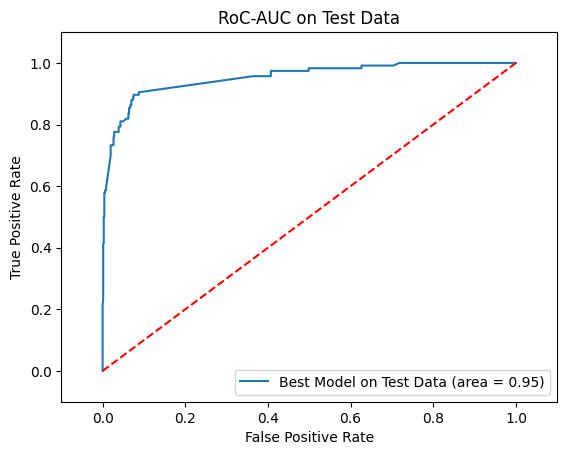

--------------------------------------------------------------------------
CPU times: total: 5.98 s
Wall time: 6.01 s


In [35]:
print('Models on Term Frequency - Bag of Words: Inverse Document Frequency data')
%time model_dvt(df_tfidf_m)

Stage 4 : Hyper-parameter tuning models that used TF-BoW embedding data

In [36]:
from sklearn.model_selection import GridSearchCV

Grid-Search hyperparameter tuning on AdaBoost Classifier

In [37]:
Y = df_tf_m['Flag_spam']
X = df_tf_m.drop('Flag_spam', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (4736, 77)
Test Data Dimensions :  (836, 77)


In [38]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train, Y_train)

CPU times: total: 2.77 s
Wall time: 26 s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 300}
Best_ROC-AUC :  96.16
Best model :  AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

 Confusion Matrix


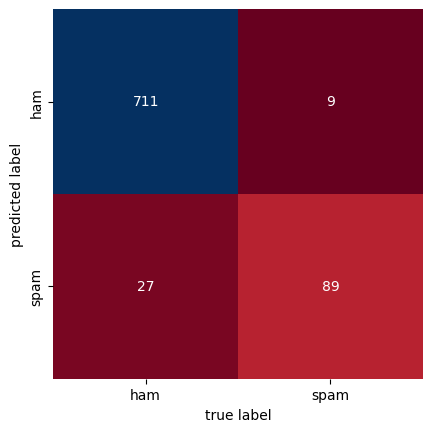


 Classification Report 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       720
        True       0.91      0.77      0.83       116

    accuracy                           0.96       836
   macro avg       0.94      0.88      0.90       836
weighted avg       0.96      0.96      0.96       836

Overall Accuracy :  95.69
Precision Score :  90.82
Recall Score :  76.72
AUC :  96.45 



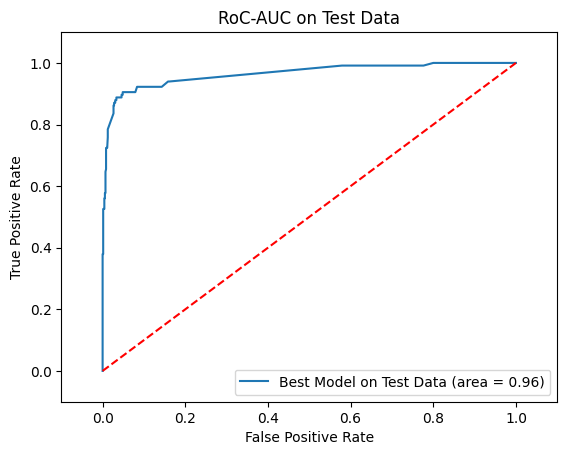

--------------------------------------------------------------------------
CPU times: total: 8.72 s
Wall time: 8.75 s
Cross Validation Accuracy :  95.57
Cross Validation Accuracy in every fold :  [97.62 95.24 94.05 95.24 96.43 98.81 96.39 90.36 93.98 97.59]


In [39]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

Grid-Search hyperparameter tuning on Random Forest Classifier

In [40]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

CPU times: total: 3.5 s
Wall time: 48.2 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 7, 5, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best_ROC-AUC :  96.05
Best model :  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

 Confusion Matrix


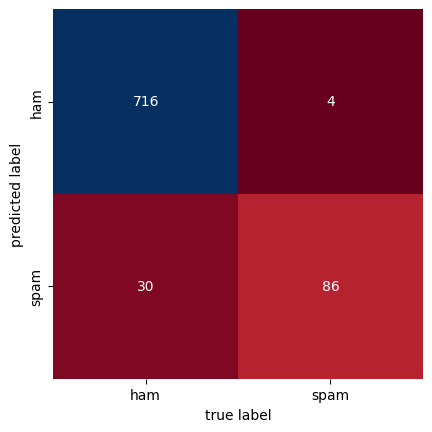


 Classification Report 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       720
        True       0.96      0.74      0.83       116

    accuracy                           0.96       836
   macro avg       0.96      0.87      0.91       836
weighted avg       0.96      0.96      0.96       836

Overall Accuracy :  95.93
Precision Score :  95.56
Recall Score :  74.14
AUC :  96.31 



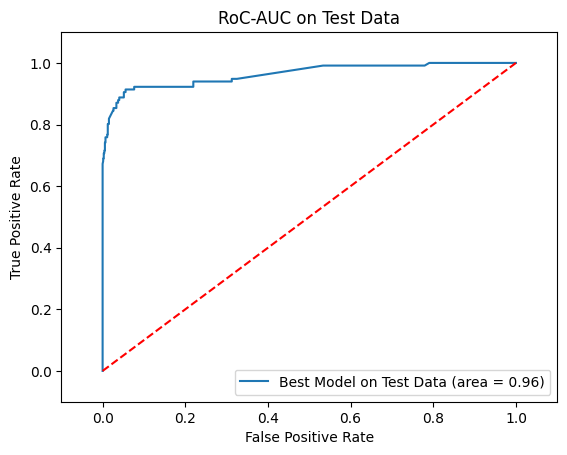

--------------------------------------------------------------------------
CPU times: total: 10.5 s
Wall time: 10.6 s
Cross Validation Accuracy :  94.85
Cross Validation Accuracy in every fold :  [95.24 92.86 96.43 96.43 95.24 96.43 97.59 90.36 92.77 95.18]


In [41]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

# Approach 2 : PyCaret

Stage1 : Data setup and Preprocessing

In [42]:
from nltk.corpus import stopwords

In [43]:
stop_words = stopwords.words('english')

In [44]:
from pycaret.classification import *


In [52]:
df_tfidf_m

,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
0,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,True,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.556016,0.0,...,0.0,0.575908,0.000000,0.00000,0.0,0.599313,0.0,0.0,0.000000,0.0
3,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.762076,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,True,0.0,0.618824,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.78553,0.0,0.000000,0.0,0.0,0.000000,0.0
5568,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
5569,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
5570,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.549962,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.630043,0.0


In [53]:
su_1 = setup(data = df_tfidf_m, target = 'Flag_spam', session_id=42) 

,Description,Value
0,Session id,42
1,Target,Flag_spam
2,Target type,Binary
3,Original data shape,"(5572, 54)"
4,Transformed data shape,"(5572, 54)"
5,Transformed train set shape,"(3900, 54)"
6,Transformed test set shape,"(1672, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


Stage 2 : Embedding on the processed text data

In [55]:
print ("setup")
clf1 = setup(data=df_tfidf_m, target='Flag_spam', session_id=123,
     fold_strategy='stratifiedkfold', 
     fold=2)

# Modelle vergleichen
print ("compare_model")
%time best_model = compare_models(include=['dt', 'nb', 'knn', 'lightgbm']) # schnelle Modelle
             #remove_models=['gbc', 'gpc', 'et'],


setup


,Description,Value
0,Session id,123
1,Target,Flag_spam
2,Target type,Binary
3,Original data shape,"(5572, 54)"
4,Transformed data shape,"(5572, 54)"
5,Transformed train set shape,"(3900, 54)"
6,Transformed test set shape,"(1672, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


compare_model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9418,0.9382,0.7552,0.7996,0.7768,0.7434,0.7438,0.2450
dt,Decision Tree Classifier,0.9313,0.8604,0.7457,0.7431,0.7444,0.7047,0.7047,0.1100
knn,K Neighbors Classifier,0.9238,0.9082,0.5871,0.7919,0.6736,0.6316,0.6410,0.1550
nb,Naive Bayes,0.4849,0.7089,0.9541,0.2010,0.3320,0.1419,0.2597,0.0650


CPU times: total: 6.3 s
Wall time: 3.59 s


In [57]:
print ("setup")
clf1 = setup(data=df_tfidf_m, target='Flag_spam', session_id=123,
     fold_strategy='stratifiedkfold', 
     fold=10)

# Modelle vergleichen
print ("compare_model")
%time best_model = compare_models() # 
             #remove_models=['gbc', 'gpc', 'et'],


setup


,Description,Value
0,Session id,123
1,Target,Flag_spam
2,Target type,Binary
3,Original data shape,"(5572, 54)"
4,Transformed data shape,"(5572, 54)"
5,Transformed train set shape,"(3900, 54)"
6,Transformed test set shape,"(1672, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


compare_model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9518,0.9489,0.7992,0.8381,0.8165,0.7888,0.7902,0.1280
et,Extra Trees Classifier,0.9508,0.9474,0.7859,0.8418,0.8109,0.7827,0.7846,0.0740
rf,Random Forest Classifier,0.9500,0.9487,0.7858,0.8349,0.8083,0.7796,0.7809,0.0740
catboost,CatBoost Classifier,0.9485,0.9500,0.7725,0.8337,0.8012,0.7716,0.7729,1.8770
gbc,Gradient Boosting Classifier,0.9441,0.9398,0.7552,0.8155,0.7835,0.7515,0.7527,0.0800
ada,Ada Boost Classifier,0.9413,0.9358,0.7458,0.8067,0.7727,0.7391,0.7413,0.0420
lr,Logistic Regression,0.9395,0.9421,0.6771,0.8421,0.7491,0.7152,0.7216,0.6140
lda,Linear Discriminant Analysis,0.9390,0.9400,0.7420,0.7934,0.7653,0.7304,0.7319,0.0150
dt,Decision Tree Classifier,0.9367,0.8784,0.7515,0.7724,0.7608,0.7244,0.7251,0.0160
svm,SVM - Linear Kernel,0.9367,0.9399,0.6905,0.8141,0.7446,0.7089,0.7136,0.0150


CPU times: total: 11.4 s
Wall time: 41 s


In [58]:
df_tfidf_m


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
0,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,True,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.556016,0.0,...,0.0,0.575908,0.000000,0.00000,0.0,0.599313,0.0,0.0,0.000000,0.0
3,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.762076,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,True,0.0,0.618824,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.78553,0.0,0.000000,0.0,0.0,0.000000,0.0
5568,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
5569,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
5570,False,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.549962,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.630043,0.0


In [68]:
clf1 = setup(data=df_tfidf_m, target='Flag_spam', session_id=42,
      fold_strategy='stratifiedkfold', 
      fold=10)
m1 = create_model('lightgbm')
tuned_m1 = tune_model(m1)
evaluate_model(m1)
evaluate_model(tuned_m1)

,Description,Value
0,Session id,42
1,Target,Flag_spam
2,Target type,Binary
3,Original data shape,"(5572, 54)"
4,Transformed data shape,"(5572, 54)"
5,Transformed train set shape,"(3900, 54)"
6,Transformed test set shape,"(1672, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.9397,0.7358,0.8864,0.8041,0.7766,0.7810
1,0.9564,0.9186,0.7925,0.8750,0.8317,0.8067,0.8080
2,0.9615,0.9744,0.8679,0.8519,0.8598,0.8375,0.8376
3,0.9436,0.9434,0.7115,0.8409,0.7708,0.7389,0.7423
4,0.9436,0.9251,0.7692,0.8000,0.7843,0.7519,0.7521
5,0.9487,0.9715,0.8077,0.8077,0.8077,0.7781,0.7781
6,0.9538,0.9425,0.7885,0.8542,0.8200,0.7936,0.7944
7,0.9538,0.9592,0.7692,0.8696,0.8163,0.7900,0.7920
8,0.9615,0.9785,0.8269,0.8776,0.8515,0.8294,0.8299


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.9506,0.7547,0.8696,0.8081,0.7803,0.7829
1,0.9436,0.9455,0.7170,0.8444,0.7755,0.7435,0.7468
2,0.9590,0.9676,0.8679,0.8364,0.8519,0.8281,0.8282
3,0.9436,0.9285,0.7308,0.8261,0.7755,0.7434,0.7452
4,0.9487,0.9258,0.7692,0.8333,0.8000,0.7706,0.7715
5,0.9513,0.9717,0.8269,0.8113,0.8190,0.7909,0.7910
6,0.9590,0.9338,0.8077,0.8750,0.8400,0.8165,0.8174
7,0.9538,0.9425,0.7885,0.8542,0.8200,0.7936,0.7944
8,0.9615,0.9764,0.8269,0.8776,0.8515,0.8294,0.8299


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…